In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load file Excel
file_path = r'C:\Users\asus\Documents\habibie\FIS 6\data_permohonan_2023_2025_rev_terbaru.xlsx' #Sesuaikan dengan lokasi file
xls = pd.ExcelFile(file_path)



In [3]:
# Baca sheet yang berisi data permohonan
df = pd.read_excel(xls, sheet_name="2023_2024")


In [ ]:
# Pastikan semua kolom yang dibutuhkan ada
kolom_wajib = ["FULLNAME", "EQP_NAME", "FITUR", "RESI_NO", 
               "PRICE_REG", "JADWAL_MULAI"]
for kolom in kolom_wajib:
    if kolom not in df.columns:
        raise ValueError(
            f"Kolom '{kolom}' tidak ditemukan dalam data!")

In [ ]:
# Konversi JADWAL_MULAI ke format datetime agar bisa diurutkan dengan benar
df["JADWAL_MULAI"] = pd.to_datetime(df["JADWAL_MULAI"], 
                                    errors='coerce')

In [24]:
# ====== 🚀 Membuat Kategori yang Bisa Digabungkan di EQP_NAME_UJI 🚀 ======
# Mengelompokkan EQP_NAME_UJI berdasarkan kata kunci
kategori_mapping = {
    "BUC": "Peralatan Telekomunikasi",
    "Access Point": "Jaringan Wi-Fi",
    "Wi-Fi": "Jaringan Wi-Fi",
    "Wireless LAN": "Jaringan Wi-Fi",
    "LTE": "Jaringan LTE",
    "Pesawat Telepon Seluler": "Pesawat Telepon Seluler",
    "IPHONE": "Pesawat Telepon Seluler",
    "Samsung Galaxy": "Pesawat Telepon Seluler",
    "Tablet Android": "Tablet",
    "IPAD": "Tablet",
    "Bluetooth Speaker": "Perangkat Audio",
    "Router": "Jaringan Internet",
    "Modem": "Jaringan Internet",
    "Smartwatch": "Perangkat Wearable",
    "TV": "TV Kabel Modulator",
    "Radio": "Analog/Digital Radio Link Terestrial/ Microwave/STL",
    "CCTV": "Keamanan",
    "Microwave": "Peralatan Elektronik",
    "Smart Home": "Perangkat Rumah Pintar",
    "Repeater": "Jaringan Internet",
    "body and limb": "Body SAR",
    "head": "Head SAR",
    "PABX": "IP-PBX",
    "bts": "BTS SELULER",
}

pesawat_telepon_seluler = ["Pesawat Telepon Selular", "LTE", "Pesawat Telepon Seluler GSM", "Pesawat Telepon Seluler DCS", "LTE (850 MHz)", "LTE (900 MHz)",
                           "LTE (2100 MHz)", "LTE (1800 MHz)", "LTE (2300 MHz)", "subscriber station 2g gsm 900 mhz (band 8)", "subscriber station 2g gsm/dcs 1800 mhz (band 3)", 
                           "subscriber station 3g wcdma 900 mhz (band 8)", "subscriber station 3g wcdma 2100 mhz (band 1)", "pesawat telepon wcdma (900 mhz)", 
                           "pesawat telepon wcdma (2100 mhz)", "jaringan 5G", "5G NR", "subscriber station nb-iot 1800 mhz (band 3)", "subscriber station nb-iot 850 mhz (band 5)", "subscriber station nb-iot 900 mhz (band 8)"]
pemancar_penyiaran_audio = ["Analog/Digital Radio Link Terestrial/ Microwave/STL", "radio"]
pstn = ["faximile"]
electromagnetic_compatibility = ["Radiated Interference", "Conducted Interference", "Radiated Susceptibility", "Conducted Susceptibility", "Conducted Emission", "Radiated Emission"]
electrical_safety = ["Tegangan Berlebih", "Arus Bocor", "laser safety"]
low_freq = ["Wi-Fi / Wireless LAN Indoor (2.4 GHz)", "Wi-Fi / Wireless LAN Indoor (5.1 GHz)", "Wi-Fi / Wireless LAN Indoor (5.2 GHz)", "Wi-Fi / Wireless LAN Indoor (5.8 GHz)", "Wi-Fi / Wireless LAN Outdoor (2.4 GHz)", "Wi-Fi / Wireless LAN Outdoor (5.8 GHz)","bluetooth", "Wi-Fi / Wireless LAN Outdoor","Geoseismik", "Low Power Wide Area", "Low Power Wide Area (LPWAN)", "Wireless Local Area Network", "Wireless Local Area Network (WLAN) Indoor", 
            "Wireless Local Area Network (WLAN)", "Zigbee", "near field communication (nfc)", "perangkat low power (<10mw)", "perangkat low power (<1000mw)", "perangkat low power (<100mw)",
            "rlan / wlan tipe 1 (5,1 ghz)", "rlan / wlan akses tipe 2 / backhaul (2,4 ghz)", "rlan / wlan lpi (6 ghz)", "rlan / wlan tipe 1 (2,4 ghz)"
            "rlan / wlan akses tipe 2 / backhaul(5,8ghz)", "automotive short range radar system",
            "short range device <1 watt", "short range device >= 1 watt", "lpwa non-seluler 900 mhz (gateway)", "lpwa non-seluler 900 mhz (endnode)", "lpwa non-seluler 400 mhz (gateway)", "lpwa non-seluler 400 mhz (endnode)", "lpwa non-seluler 2400 mhz (gateway)", "lpwa non-seluler 900 mhz (endnode)" ,"Wi-Fi", "Wireless LAN", "Wi-Fi / Wireless LAN Indoor"]
high_freq = ["Repeater", "modem", "modem radio", "Radio Trunking", "handy talky (uhf), UHF, handy talky (vhf), VHF "]
inter_optic = ["wdm (dwdm, cwdm)", "onu (optical node unit)/ont (optical network termination)", "optical network terminal (ont)", "video phone / video conference", "video conference"
               "olt (optical line termination)", "ont (optical network termination)", "IP-PBX", "IP Phone", "ip-phone", "TV Kabel Modulator"]
gateway = ["media gateway controller"]
tel_sat = ["stasiun bumi (s-band)", "stasiun bumi (x-band)", "lna/lnb c-band", "lna/lnb ku-band", "lna/lnb ka-band", "Ina/Inb", "stasiun bunmi"]
radar = ["radar maritim (9300 - 9500 mhz)","radar maritim (3100 - 3300 mhz)", "radar surveillance", "radar cuaca", "radar surveilance"]
stb_tv = ["set top box penerima satelit"]
antena = ["antenna inner transmitter (4 - 10 ghz)", "antenna inner transmitter (400 mhz - 1 ghz)", 
          "antenna pemancar siaran", "antenna inner transmitter"]
telkom = ["down converter", "demodulator","up converter", "Low Noise Amplifier (LNA)", "Low Noise Block (LNB)", "High-Power Amplifier (HPA)", "modem encoder", "telepon satelit", "VSAT Modulator", "VSAT Upconverter", "lna/lnb", "lna/lnb c-band", "lna/lnb ka-band", "lna/lnb ku-band", 
          "very small aperture terminal (vsat) (c-band)", "very small aperture terminal (vsat)", "vsat modulator", "Very Small Aperture Terminal (VSAT) (Ka-Band)", "Very Small Aperture Terminal (VSAT) (Ku-Band)", "stasiun bumi"]
st_box = ["set top box penerima terrestrial", "Set Top Box Penerima Satelit", "Set Top Box Kabel"]

def kelompokkan_perangkat(eqp_name):
    eqp_name = str(eqp_name).lower().strip()  # Pastikan dalam format string
    
    # Periksa jika ada kata kunci Wi-Fi dalam EQP_NAME_UJI    
    for keyword in telkom:
        if keyword.lower() in eqp_name:
            return "Telekomunikasi Berbasis Satelit"

    for keyword in pesawat_telepon_seluler :
        if keyword.lower() in eqp_name :
            return "Pesawat Telepon Seluler dan Modem Seluler"
    
    for keyword in pstn :
        if keyword.lower() in eqp_name :
            return "Public Switched Telephone Network"
        
    for keyword in pemancar_penyiaran_audio :
        if keyword.lower() in eqp_name:
            return "Radio Point to Point/Multipoint"
        
    for keyword in electromagnetic_compatibility :
        if keyword.lower() in eqp_name :
            return "Electromagnetic Compatibility & Electrical Safety"
    
    for keyword in electrical_safety :
        if keyword.lower() in eqp_name :
            return "Electrical Safety"
    
    for keyword in low_freq :
        if keyword.lower() in eqp_name:
            return "Short Range Device/Low power"
        
    for keyword in high_freq :
        if keyword.lower() in eqp_name :
            return "High Frequency"
        
    for keyword in inter_optic :
        if keyword.lower() in eqp_name :
            return "Interface Optical"
        
    for keyword in gateway :
        if keyword.lower() in eqp_name :
            return "Gateway, Switching, Router, Multiplexing, dan Signaling"
        
    for keyword in tel_sat :
        if keyword.lower() in eqp_name :
            return "Telepon Satelit"
        
    for keyword in radar :
        if keyword.lower() in eqp_name :
            return "radar"
        
    for keyword in stb_tv :
        if keyword.lower() in eqp_name :
            return "Set Top Box/TV Digital"
    
    for keyword in antena :
        if keyword.lower() in eqp_name :
            return "Antenna"
    
    # Periksa dalam kategori_mapping
    for keyword, category in kategori_mapping.items():
        if keyword.lower() in eqp_name:
            return category
    
    return eqp_name  # Jika tidak ditemukan dalam kategori, pakai nama asli

In [26]:
# # Kumpulan kata kunci yang dapat digabungkan
# kategori_mapping = {
#     "faximile": ["mesin fotocopy"],
#     "peralatan telekomunikasi": ["BUC"],
#     "jaringan wi-fi": ["Access Point", "Wi-Fi", "Wireless LAN"],
#     "jaringan lte": ["LTE"],
#     "jaringan 5g": ["5G NR"],
#     "pesawat telepon seluler": ["Pesawat Telepon Seluler", "IPHONE", "Samsung Galaxy"],
#     "tablet": ["Tablet Android", "IPAD"],
#     "perangkat audio": ["Bluetooth Speaker"],
#     "jaringan internet": ["Router", "Modem", "Repeater"],
#     "perangkat wearable": ["Smartwatch"],
#     "tv kabel modulator": ["TV"],
#     "keamanan": ["CCTV"],
#     "analog/digital radio link terestrial/microwave/stl": ["Radio"],
#     "peralatan elektronik": ["Microwave"],
#     "perangkat rumah pintar": ["Smart Home"],
#     "body sar": ["body and limb"],
#     "head sar": ["head"],
#     "ip-pbx": ["PABX"],
#     "bts seluler": ["bts"],
#     "pemancar penyiaran radio": ["Analog/Digital Radio Link Terestrial/ Microwave/STL", "radio"],
#     "electromagnetic compatibility & electrical safety": ["Radiated Interference", "Conducted Interference", "Radiated Susceptibility", "Conducted Susceptibility"],
#     "electrical safety": ["Tegangan Berlebih", "Arus Bocor"]
# }

# def kelompokkan_perangkat(eqp_name):
#     eqp_name = str(eqp_name).lower().strip()

#     # Cek di kategori mapping
#     for category, keywords in kategori_mapping.items():
#         if any(keyword.lower() in eqp_name for keyword in keywords):
#             return category

#     return "Lainnya"  # Jika tidak ditemukan kategori


In [27]:
# df["FULLNAME"] = df["FULLNAME"].str.strip()
# df["EQP_NAME_UJI_GROUP"] = df["EQP_NAME_UJI_GROUP"].str.strip()
# df["EQP_NAME"] = df["EQP_NAME"].str.strip()
# df["RESI_NO"] = df["RESI_NO"].astype(str).str.strip() # Pastikan RESI_NO dalam bentuk string

# # Cek apakah ada duplikasi yang menyebabkan sum tidak akurat
# print(df.duplicated(subset=["FULLNAME", "EQP_NAME_UJI_GROUP", "EQP_NAME", "RESI_NO"], keep=False))

In [28]:
# df_duplikat = df[df.duplicated(subset=["FULLNAME", "EQP_NAME_UJI_GROUP", "EQP_NAME", "RESI_NO"], keep=False)]
# print(df_duplikat.sort_values(by=["FULLNAME", "EQP_NAME_UJI_GROUP"]))

In [25]:
# Terapkan fungsi kategori ke EQP_NAME_UJI
df["FITUR_GROUP"] = df["FITUR"].apply(kelompokkan_perangkat)
# Cek hasil awal klasifikasi (perhatikan kolom yang benar)
print(df[["FITUR", "FITUR_GROUP"]].head(14))

                                                FITUR  \
0                                            Faximile   
1                                            Faximile   
2                                    VSAT Upconverter   
3               Wi-Fi / Wireless LAN Indoor (5.8 GHz)   
4               Wi-Fi / Wireless LAN Indoor (5.2 GHz)   
5              Wi-Fi / Wireless LAN Outdoor (5.8 GHz)   
6               Wi-Fi / Wireless LAN Indoor (2.4 GHz)   
7               Wi-Fi / Wireless LAN Indoor (5.8 GHz)   
8                                    VSAT Upconverter   
9   Analog/Digital Radio Link Terestrial/ Microwav...   
10                                    LNA/LNB KA-BAND   
11                               High Power Amplifier   
12                                     Down Converter   
13                                     Down Converter   

                          FITUR_GROUP  
0   Public Switched Telephone Network  
1   Public Switched Telephone Network  
2     Telekomunikasi Ber

In [ ]:
# Pastikan tarif bertipe numerik
df["PRICE_REG"] = pd.to_numeric(df["PRICE_REG"], 
                                errors='coerce').fillna(0)

In [ ]:
# Menggabungkan data berdasarkan aturan pengelompokan
df_merged = df.groupby(
    ["FULLNAME", "FITUR_GROUP", "EQP_NAME", "RESI_NO"], 
    as_index=False
).agg({
    "PRICE_REG": "sum",  # Menjumlahkan tarif
    "JADWAL_MULAI": "min"  # Menggunakan jadwal mulai terawal dalam kelompok
})

# df_merged = df.groupby(
#     ["FULLNAME", "EQP_NAME_UJI_GROUP"], 
#     as_index=False
# ).agg({
#     "TARIF": "sum",  
#     "JADWAL_MULAI": "min"  
# })


# Urutkan hasil akhir berdasarkan JADWAL_MULAI dan RESI_NO
df_merged = df_merged.sort_values(
    by=["JADWAL_MULAI", "RESI_NO"], ascending=[True, True])

In [28]:
# Menampilkan hasil
print(df_merged.head())

                    FULLNAME                        FITUR_GROUP  \
847          ARRY JANUARIZKY  Public Switched Telephone Network   
1550       FAJAR DWI SANTOSO  Public Switched Telephone Network   
2974  RISANG GALIH BHAKTIAJI    Telekomunikasi Berbasis Satelit   
1842        HERMAWAN SUKARNO       Short Range Device/Low power   
1843        HERMAWAN SUKARNO       Short Range Device/Low power   

                         EQP_NAME RESI_NO  PRICE_REG        JADWAL_MULAI  
847                mesin fotocopy       1    4500000 2023-01-10 09:25:00  
1550               mesin fotocopy       2    4500000 2023-01-10 11:30:00  
2974              BUC C-Band 100W       3    6500000 2023-01-12 09:00:00  
1842       Access Point Aruba 510       4    9000000 2023-01-16 08:35:00  
1843  Access Point Extreme AP505i       6    9000000 2023-01-16 08:42:00  


In [30]:
# # Simpan hasil merge ke file Excel
output_file = r'C:\Users\asus\Documents\habibie\FIS 6\data_bersih_rev_baru_3.xlsx'
df_merged.to_excel(output_file, index=False)

with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    for year in sorted(df_merged["JADWAL_MULAI"].dt.year.unique()):
        df_year = df_merged[df_merged["JADWAL_MULAI"].dt.year == year]
        df_year.to_excel(writer, sheet_name=str(year), index=False)

# Menampilkan hasil
print(df_merged.head())
print(f"Data berhasil diproses dan disimpan di: {output_file}")




                    FULLNAME                        FITUR_GROUP  \
847          ARRY JANUARIZKY  Public Switched Telephone Network   
1550       FAJAR DWI SANTOSO  Public Switched Telephone Network   
2974  RISANG GALIH BHAKTIAJI    Telekomunikasi Berbasis Satelit   
1842        HERMAWAN SUKARNO       Short Range Device/Low power   
1843        HERMAWAN SUKARNO       Short Range Device/Low power   

                         EQP_NAME RESI_NO  PRICE_REG        JADWAL_MULAI  
847                mesin fotocopy       1    4500000 2023-01-10 09:25:00  
1550               mesin fotocopy       2    4500000 2023-01-10 11:30:00  
2974              BUC C-Band 100W       3    6500000 2023-01-12 09:00:00  
1842       Access Point Aruba 510       4    9000000 2023-01-16 08:35:00  
1843  Access Point Extreme AP505i       6    9000000 2023-01-16 08:42:00  
Data berhasil diproses dan disimpan di: C:\Users\asus\Documents\habibie\FIS 6\data_bersih_rev_baru_3.xlsx


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


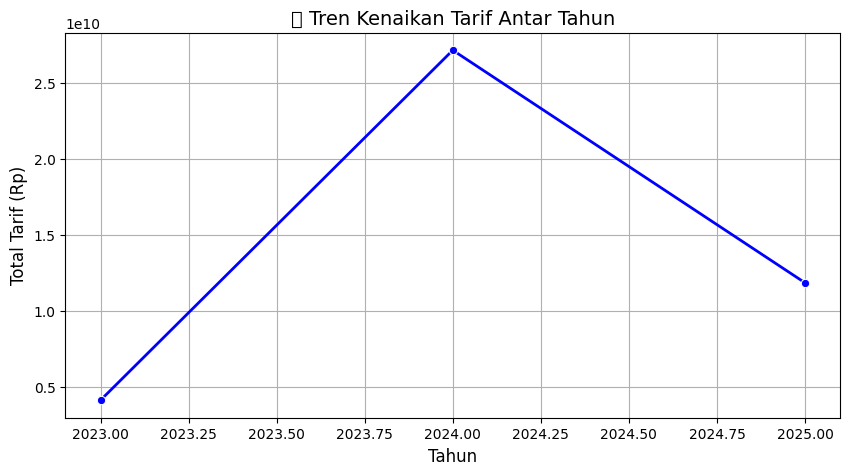

In [12]:
# ========== 📊 Membuat Grafik Tren Kenaikan Tarif Antar Tahun ==========
df_merged["TAHUN"] = df_merged["JADWAL_MULAI"].dt.year
df_trend = df_merged.groupby("TAHUN")["PRICE_REG"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_trend, x="TAHUN", y="PRICE_REG", marker="o", linewidth=2, color="b")

plt.title("📊 Tren Kenaikan Tarif Antar Tahun", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Total Tarif (Rp)", fontsize=12)
plt.grid(True)

# Simpan grafik

plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9704\1460482433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=permohonan_per_tahun.index, y=permohonan_per_tahun.values, palette="viridis")


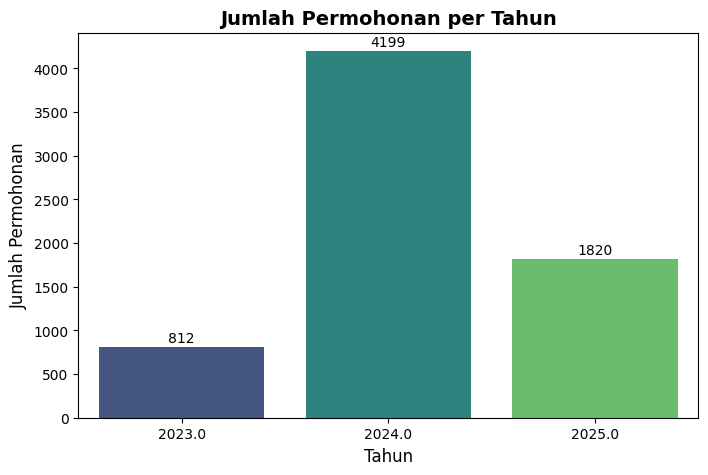

In [13]:
# Pastikan nama kolom sesuai, kita pakai kolom "JADWAL_MULAI" sebagai tanggal permohonan
df['Tahun'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce').dt.year

# Hitung jumlah permohonan per tahun
permohonan_per_tahun = df['Tahun'].value_counts().sort_index()

# Buat visualisasi dengan Matplotlib & Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=permohonan_per_tahun.index, y=permohonan_per_tahun.values, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Permohonan", fontsize=12)
plt.title("Jumlah Permohonan per Tahun", fontsize=14, fontweight='bold')

# Tambahkan angka di atas setiap batang
for i, v in enumerate(permohonan_per_tahun.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

# Tampilkan grafik
plt.show()

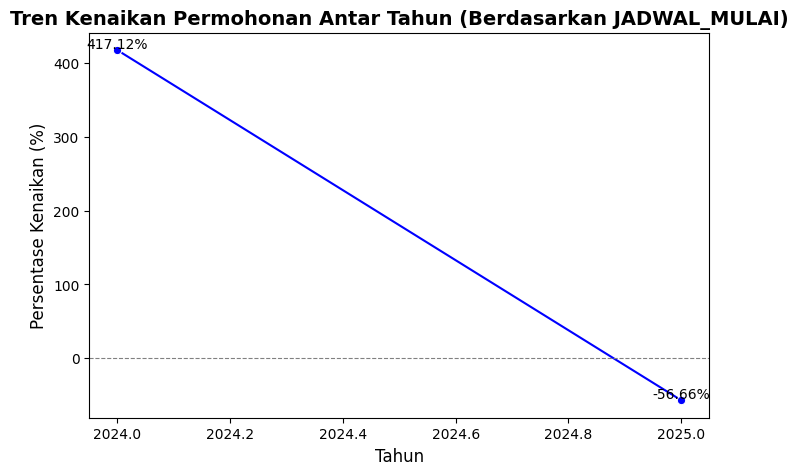

In [14]:
# Pastikan nama kolom sesuai, kita pakai kolom "JADWAL_MULAI" sebagai tanggal permohonan
df['Tahun'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce').dt.year

# Hitung jumlah permohonan per tahun berdasarkan "JADWAL_MULAI"
permohonan_per_tahun = df['Tahun'].value_counts().sort_index()

# Konversi ke DataFrame agar lebih mudah dianalisis
df_tren = permohonan_per_tahun.reset_index()
df_tren.columns = ["Tahun", "Jumlah Permohonan"]

# Hitung persen perubahan dari tahun sebelumnya
df_tren["Persentase Kenaikan"] = df_tren["Jumlah Permohonan"].pct_change() * 100

# Buat visualisasi tren perubahan
plt.figure(figsize=(8, 5))
sns.lineplot(x=df_tren["Tahun"], y=df_tren["Persentase Kenaikan"], marker="o", color="b")

# Tambahkan label dan judul
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Persentase Kenaikan (%)", fontsize=12)
plt.title("Tren Kenaikan Permohonan Antar Tahun (Berdasarkan JADWAL_MULAI)", fontsize=14, fontweight='bold')

# Tambahkan angka di setiap titik
for i, (tahun, persen) in enumerate(zip(df_tren["Tahun"], df_tren["Persentase Kenaikan"])):
    if not pd.isna(persen):  # Hindari menampilkan NaN
        plt.text(tahun, persen + 2, f"{persen:.2f}%", ha='center', fontsize=10)

# Tampilkan garis horizontal di nol untuk referensi
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# Tampilkan grafik
plt.show()